<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%BA%8C_%E6%B2%88%E7%9D%BF%E6%9C%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [69]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

In [70]:
data = pd.read_csv('/content/drive/MyDrive/大學/大數據資料/高齡獨居化計畫.csv')
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)
data = data.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))

city_A_no = pd.DataFrame(data.groupby('縣市').sum()['Total_older'] / data.groupby('縣市').sum()['total_city_people'],columns=['older_precent'])
city_A_no['older_lonely_precent'] = data.groupby('縣市').sum()['total_old_and_lonely'] / data.groupby('縣市').sum()['total_city_people']
data = data.merge(city_A_no, left_on=('縣市'), right_on=('縣市'))

df = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/經濟指標資料1.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
data = data.merge(df, left_on=('TOWNNAME'), right_on=('TOWNNAME'))

dx = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/經濟指標資料2.xlsx')
dx = dx.drop(['Unnamed: 0','TOWNID','TOWNCODE','COUNTYNAME','TOWNENG','COUNTYID','COUNTYCODE'],axis = 1)
data = pd.merge( data, dx , on='TOWNNAME')

data['商店總數'] = data['診所數量']+data['金融機構']+data['超商超市市場']+data['餐飲']+data['加油站數量']
# data.info()

#第一題

# 新增區段

In [71]:
city_data_older = data.groupby('COUNTYNAME').mean().sort_values('older_precent')[::-1]
city_list_older = city_data_older.index.tolist()
city_older = pd.DataFrame(city_data_older,city_list_older)
city_older['商店趴數'] = data.groupby('縣市').sum()['商店總數'] / data.groupby('縣市').sum()['total_city_people']
# city_older[['older_precent','單價元坪','商店趴數']]

In [34]:
# def colors(data_len):
#   colors = cm.RdYlGn(np.linspace(0,1,len(data_len)))
#   return colors

def first_6(data_name,n):
  axes = data_name[n][:6].plot.bar(rot = 0 ,color = 'lightsalmon')
  return Drow_P(axes)

def city_6(data_name,n,p):
  axes = data_name[n].iloc[p].plot.bar(rot = 0 ,color = 'lightsalmon')
  return Drow_P(axes)
  
def Drow_P(x):
  for label in x.get_xticklabels():
    label.set_fontproperties(myfont)
  plt.legend(prop=myfont)

## 商店

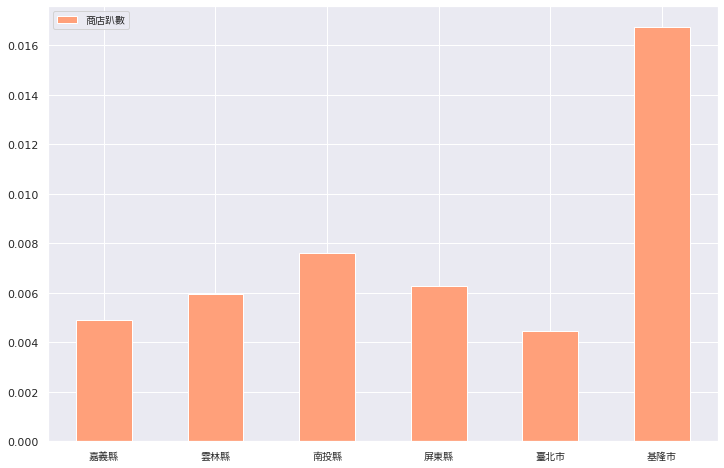

In [61]:
first_6(city_older,'商店趴數')

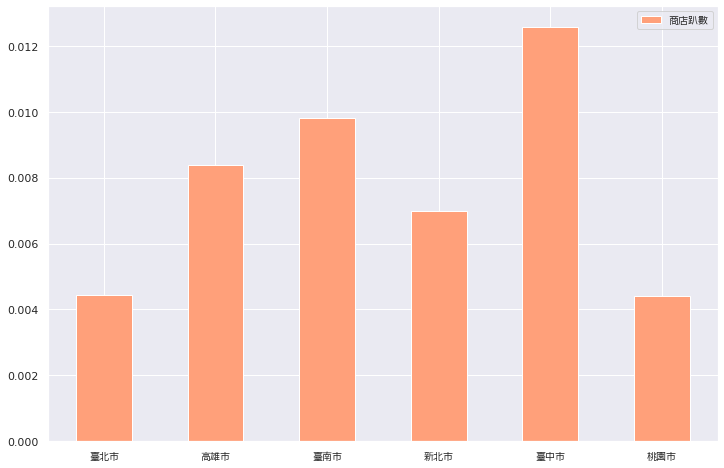

In [63]:
city_6(city_older,'商店趴數',[4,12,13,14,-4,-2])

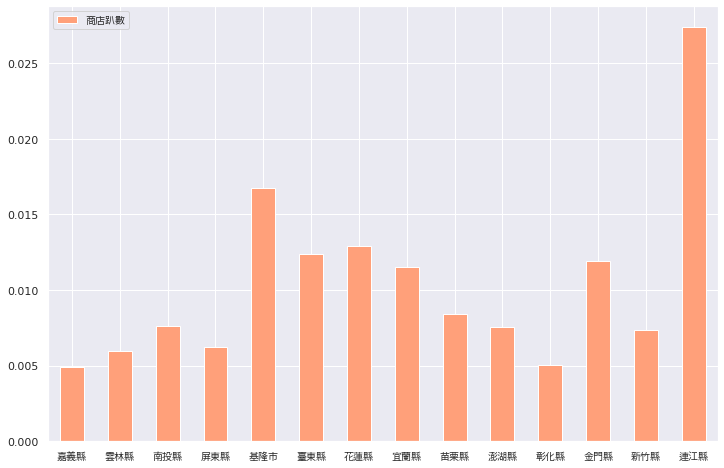

In [68]:
#非六都
city_6(city_older,'商店趴數',[i for i in range(22) if i not in [4,12,13,14,15,16,18,20]])

## 實價登差異

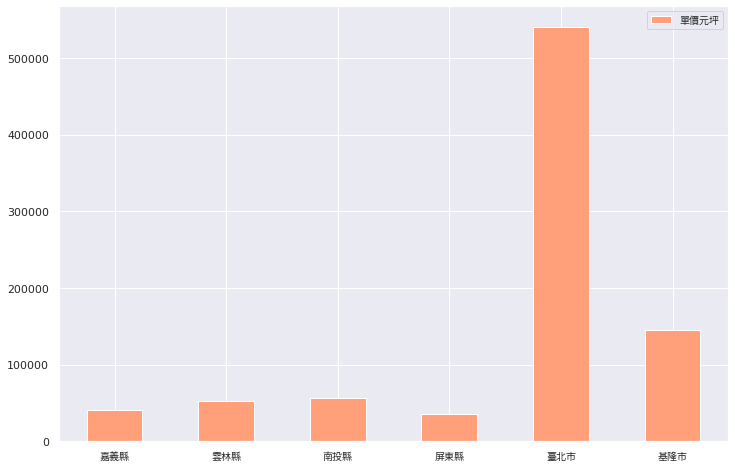

In [37]:
# X軸 高齡化高到低
# Y軸 單價元坪

first_6(city_older,'單價元坪')

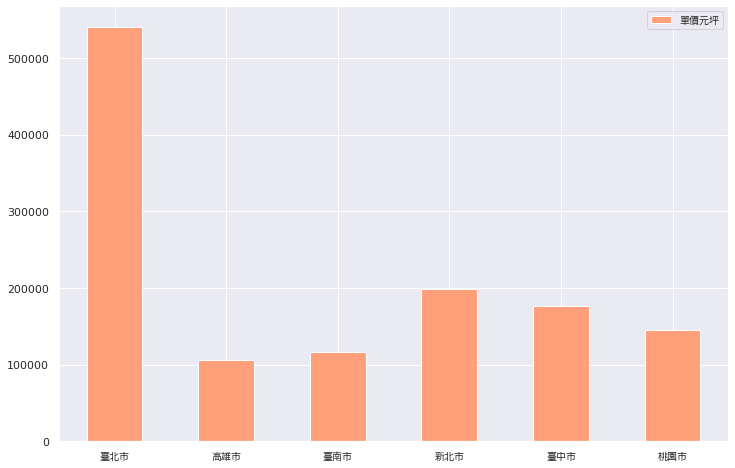

In [38]:
# X軸 六都高齡化高到低
# Y軸 單價元坪
# 六都位置[2,12,13,15,17,-2]

city_6(city_older,'單價元坪',[4,12,13,14,-4,-2])

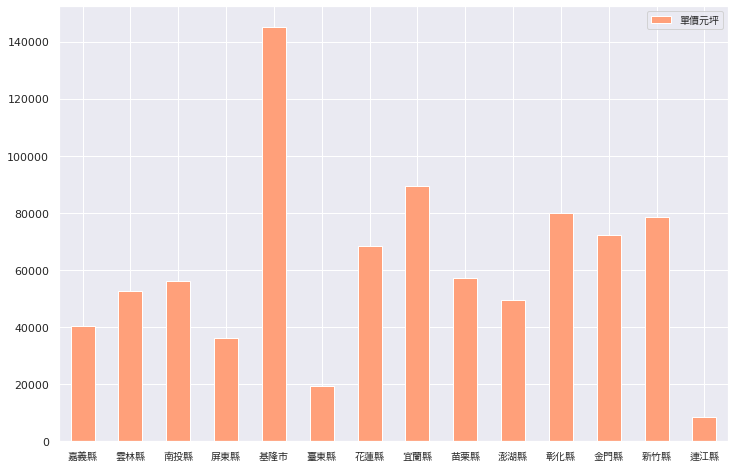

In [39]:
#非六都
city_6(city_older,'單價元坪',[i for i in range(22) if i not in [4,12,13,14,15,16,18,20]])

## 所得差異

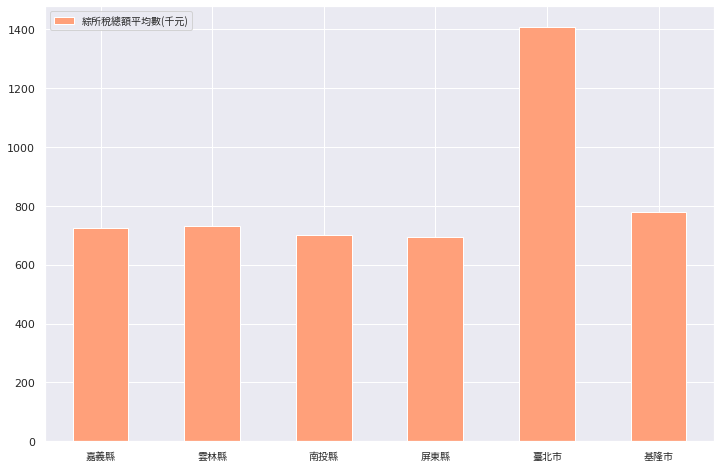

In [40]:
# X軸 高齡化高到低
# Y軸 綜所稅總額平均數(千元)

first_6(city_older,'綜所稅總額平均數(千元)')

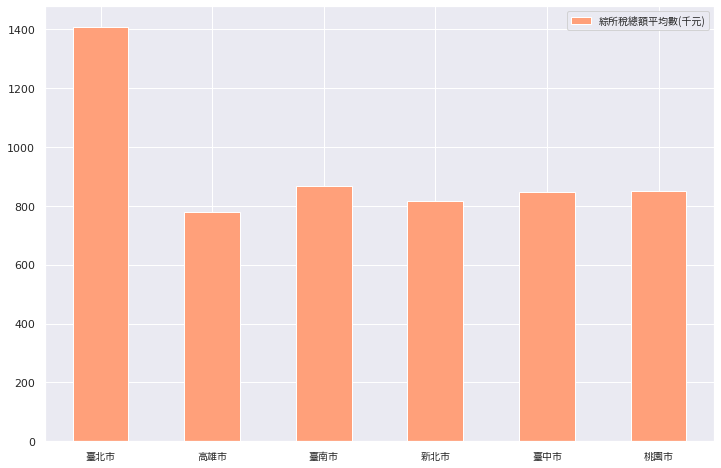

In [41]:
# X軸 六都高齡化高到低
# Y軸 綜所稅總額平均數(千元)

city_6(city_older,'綜所稅總額平均數(千元)',[4,12,13,14,-4,-2])

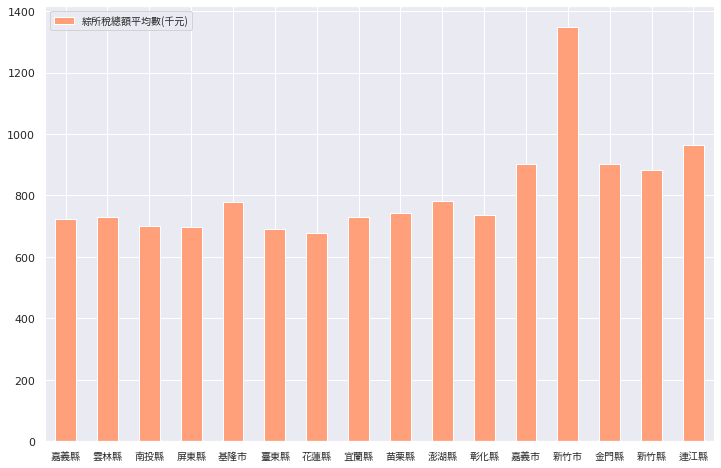

In [42]:
#非六都
city_6(city_older,'綜所稅總額平均數(千元)',[i for i in range(22) if i not in [4,12,13,14,18,20]])

# 第二題

In [72]:
city_D_OLP = data.groupby('COUNTYNAME').mean().sort_values('older_lonely_precent')[::-1]
city_L_OLP = city_D_OLP.index.tolist()
city_OLP = pd.DataFrame(city_D_OLP,city_L_OLP)
city_OLP['商店趴數'] = data.groupby('縣市').sum()['商店總數'] / data.groupby('縣市').sum()['total_city_people']
# city_OLP[['older_lonely_precent','單價元坪','商店趴數']]

## 商店


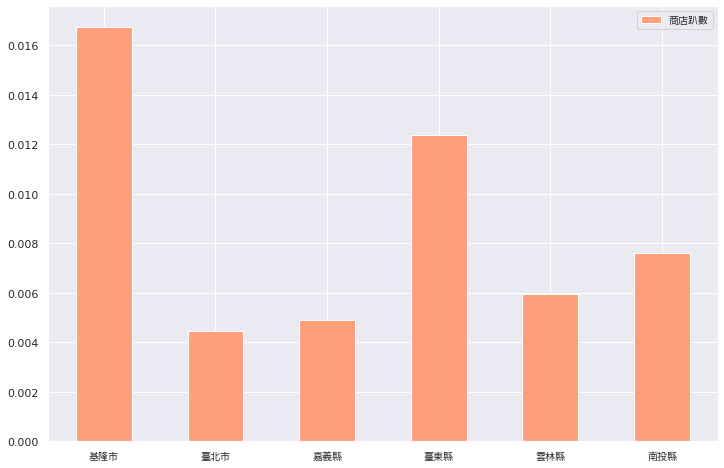

In [65]:
first_6(city_OLP,'商店趴數')

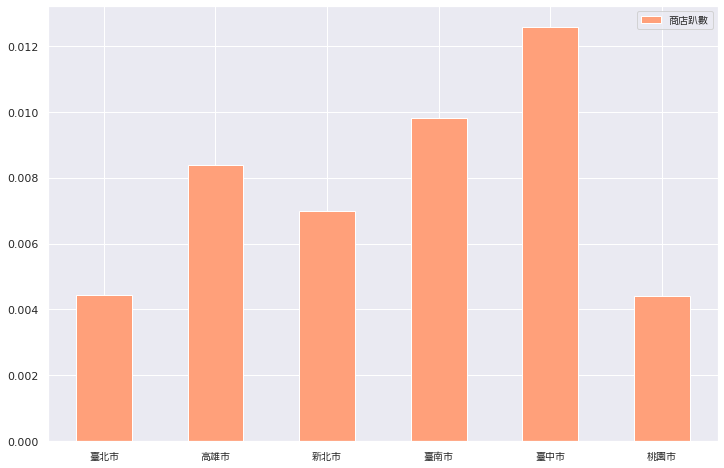

In [67]:
city_6(city_OLP,'商店趴數',[1,8,10,13,16,18])

## 實價登入差異


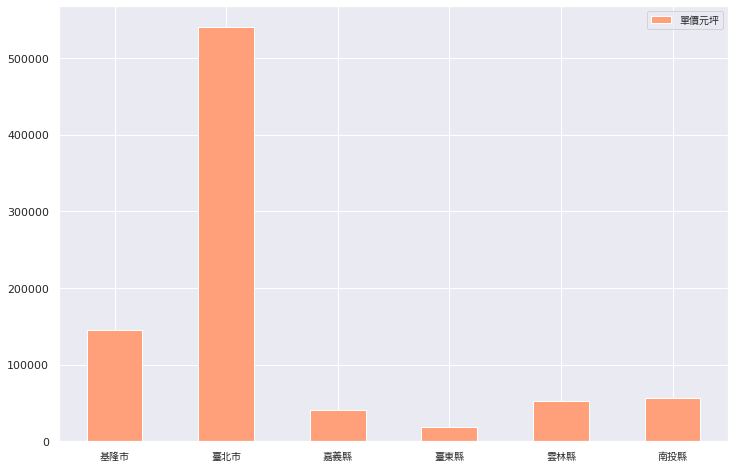

In [46]:
# X軸 高齡獨居化高到低
# Y軸 單價元坪

first_6(city_OLP,'單價元坪')

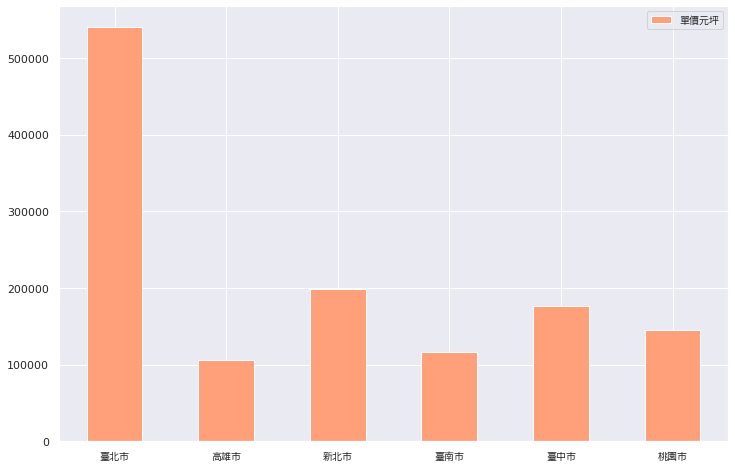

In [47]:
# X軸 六都高齡獨居化高到低
# Y軸 單價元坪
# 六都位置[0,8,11,12,17,19]

city_6(city_OLP,'單價元坪',[1,8,10,13,16,18])

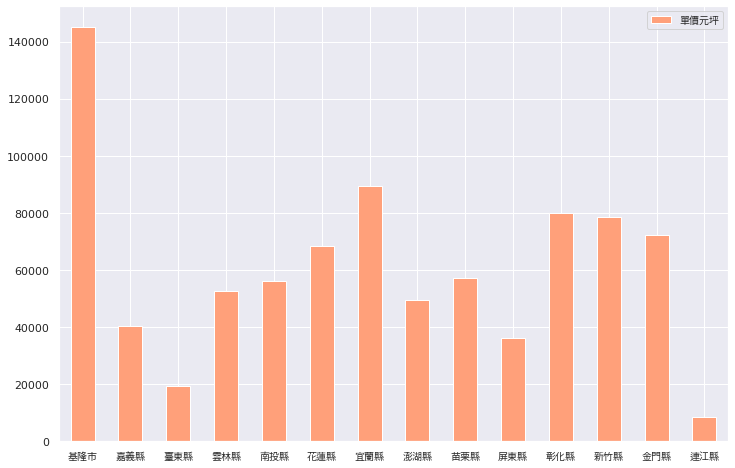

In [48]:
#非六都
city_6(city_OLP,'單價元坪',[i for i in range(22) if i not in [1,8,10,13,14,15,16,18]])

## 所得差異

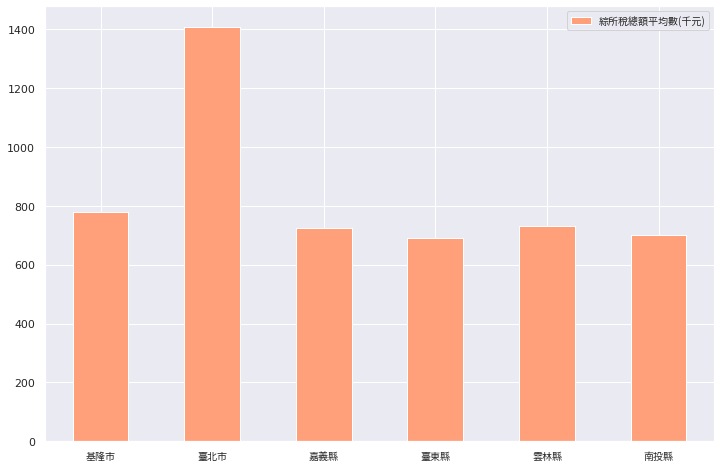

In [49]:
# X軸 高齡獨居化高到低
# Y軸 綜所稅總額平均數(千元)

first_6(city_OLP,'綜所稅總額平均數(千元)')

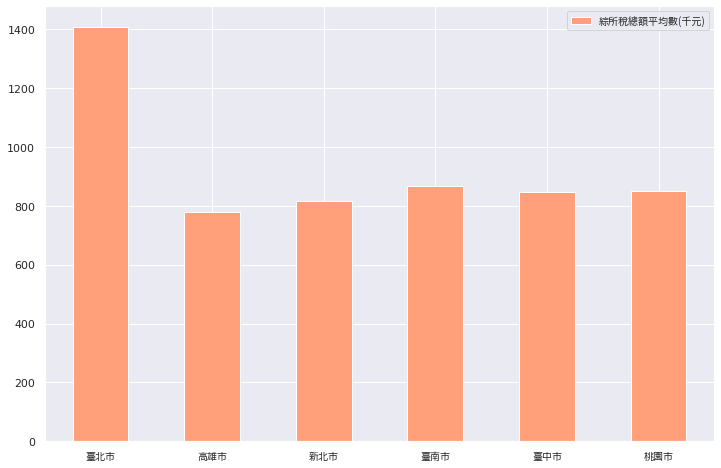

In [50]:
# X軸 六都高齡獨居化高到低
# Y軸 綜所稅總額平均數(千元)

city_6(city_OLP,'綜所稅總額平均數(千元)',[1,8,10,13,16,18])

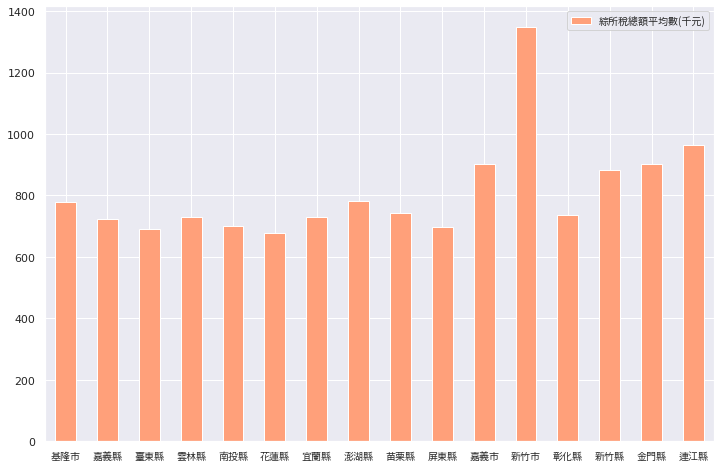

In [51]:
#非六都
city_6(city_OLP,'綜所稅總額平均數(千元)',[i for i in range(22) if i not in [1,8,10,13,16,18]])

# 第三題

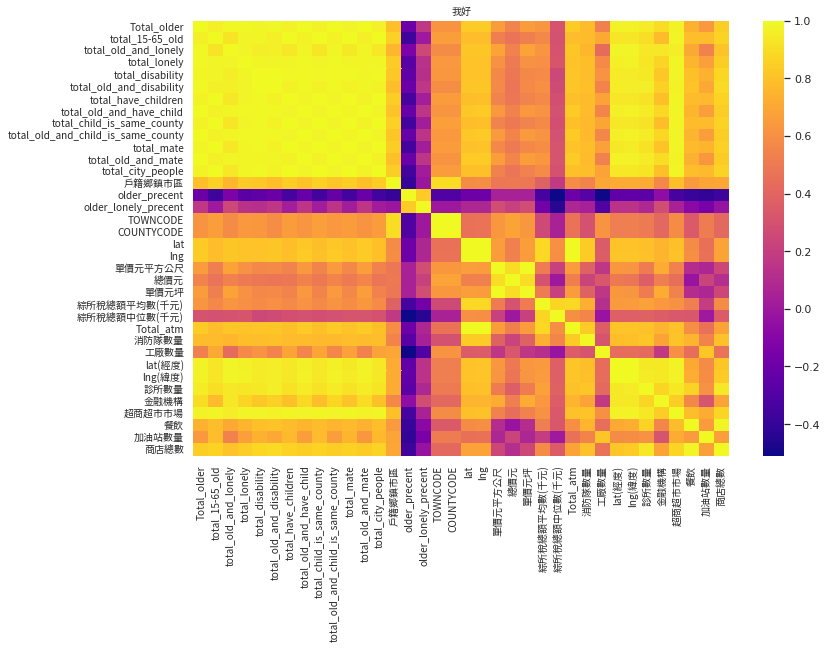

In [52]:
sns.set(font=myfont.get_name())
plt.title('我好',fontproperties=myfont)
plt.xticks(fontproperties=myfont)
plt.yticks(fontproperties=myfont)
sns.heatmap(city_OLP.iloc[:,1:].corr(),annot=False,cmap='plasma')